QUESTION FOUR
-  Explain the following data pre-processing
        - Data Cleaning: - Handling Missing data; Handling Noisy Data (Binning, regression, clustering)
        - Transformation – Any three methods
        - Data Reduction – Any three methods
- By using your selected data, show a python implementation of each listed processes.

This notebook is an implementation of data preprocessing techniques as defined in the question above, with short explanations and observations made as we run codes to achieve the required techniques.


## PRELIMS 
This invloves installing the required libraries and importing the data that will need to be processed

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
sales = pd.read_csv(r'C:\Users\user\Downloads\sales_data_sample.csv', encoding='ISO-8859-1')

In [3]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## DATA CLEANING

- This section highlights the process of dealing with missing data and noisy data, with the aim of making it ready for more complex modelling and analysis.
- Noisy data can be handles using techniques like binning, regression and clustering but it may also involve simple processes like removing spaces, commas brackets and mixed formmats of data.


Handling Missing Data

In [4]:
# STEP 1: WE GET RID OF MSRP COLUMN SINCE IT DOESN'T ADD VALUE TO OUR ANALYSIS
sales= sales.drop(columns=['MSRP'])
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
# STEP 2: WE GET RID OF ADDRESSLINE2 SINCE MOST OF ITS CELLS HAVE NULL VALUES AND ADDRESSLINE1 ALREADY CAPTURES THE ADDRESS INFORMATION THAT'S NEEDED
sales = sales.drop(columns=['ADDRESSLINE2'])
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Handling Noisy Data

- There were some issues that were observed in the dataset that require recitification. They include:
1. The PRICEEACH column has different number formats (inconsistent decimal places)

2. The SALES column also has inconsistent decimal places

3. The ORDERDATE column seems to have a time 00:00 which is not needed at all

4. The PHONE column has some values with decimal points, brackets, hyphens, or a combination of these formats. It should just have one format which is the number with a plus(+) sign in front of it and nothing else.

5. There are some STATES with blank fields for the column CITY that is not in the USA.

6. There are fields within the POSTALCODE column that have missing values. Replacing with 0 would suffice.
 Additionally, there are some fields that are not right aligned(it could be as a result of space) and its especially for the fields whose codes have a letter or other symbols.

7. Lastly, in all columns, we ought to get rid of the whitespace characters, if any.

In [6]:
# 1. Inconsistent decimal places in 'PRICEEACH'
print("Handling inconsistent decimal places in 'PRICEEACH':")
sales['PRICEEACH'] = sales['PRICEEACH'].astype(float).round(2)
print(sales[['PRICEEACH']].head())
print("-" * 30)

Handling inconsistent decimal places in 'PRICEEACH':
   PRICEEACH
0      95.70
1      81.35
2      94.74
3      83.26
4     100.00
------------------------------


In [7]:
# 2. Inconsistent decimal places in 'SALES'
print("Handling inconsistent decimal places in 'SALES':")
sales['SALES'] = sales['SALES'].astype(float).round(2)
print(sales[['SALES']].head())
print("-" * 30)

Handling inconsistent decimal places in 'SALES':
     SALES
0  2871.00
1  2765.90
2  3884.34
3  3746.70
4  5205.27
------------------------------


In [8]:
# 3. Remove time from 'ORDERDATE'
print("Removing time from 'ORDERDATE':")
sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE']).dt.date
print(sales[['ORDERDATE']].head())
print("-" * 30)

Removing time from 'ORDERDATE':
    ORDERDATE
0  2003-02-24
1  2003-05-07
2  2003-07-01
3  2003-08-25
4  2003-10-10
------------------------------


In [9]:
# 4. Standardize 'PHONE' format
print("Standardizing 'PHONE' format:")
def standardize_phone(phone):
    if pd.isna(phone):
        return None
    # Remove all non-numeric characters except the leading '+'
    cleaned_phone = re.sub(r'(?<!^)\D+', '', str(phone))
    if str(phone).startswith('+'):
        return cleaned_phone
    else:
        return '+' + cleaned_phone

sales['PHONE'] = sales['PHONE'].apply(standardize_phone)
print(sales[['PHONE']].head())
print("-" * 30)


Standardizing 'PHONE' format:
          PHONE
0   +2125557818
1     +26471555
2  +33146627555
3   +6265557265
4   +6505551386
------------------------------


In [10]:
# 5. Handle blank 'STATE' for non-USA entries (corrected)
print("Handling blank 'STATE' for non-USA entries:")
sales['STATE'] = np.where((sales['COUNTRY'] != 'USA') & (sales['STATE'].isnull()), sales['CITY'], sales['STATE'])
print(sales[['STATE', 'CITY', 'COUNTRY']].head(10))
print("-" * 30)

Handling blank 'STATE' for non-USA entries:
    STATE           CITY COUNTRY
0      NY            NYC     USA
1   Reims          Reims  France
2   Paris          Paris  France
3      CA       Pasadena     USA
4      CA  San Francisco     USA
5      CA     Burlingame     USA
6   Lille          Lille  France
7  Bergen         Bergen  Norway
8      CA  San Francisco     USA
9   Paris          Paris  France
------------------------------


In [11]:
# 6. Handle 'POSTALCODE' missing values and alignment
print("Handling 'POSTALCODE' missing values and alignment:")
sales['POSTALCODE'] = sales['POSTALCODE'].fillna('0')

def right_align_postalcode(postalcode):
    return str(postalcode).strip()

sales['POSTALCODE'] = sales['POSTALCODE'].apply(right_align_postalcode)
print(sales[['POSTALCODE']].head(15))
print("-" * 30)

Handling 'POSTALCODE' missing values and alignment:
   POSTALCODE
0       10022
1       51100
2       75508
3       90003
4           0
5       94217
6       59000
7      N 5804
8           0
9       75016
10       3004
11      10022
12      94019
13      97562
14      44000
------------------------------


In [12]:
# 7. Remove whitespace from all columns
print("Removing whitespace from all columns:")
for col in sales.columns:
    if sales[col].dtype == 'object':
        sales[col] = sales[col].astype(str).str.strip()
print("DataFrame after removing whitespace:")
print(sales.head())
print("-" * 30)

Removing whitespace from all columns:
DataFrame after removing whitespace:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...         PHONE  \
0  2003-02-24  Shipped       1         2     2003  ...   +2125557818   
1  2003-05-07  Shipped       2         5     2003  ...     +26471555   
2  2003-07-01  Shipped       3         7     2003  ...  +33146627555   
3  2003-08-25  Shipped       3         8     2003  ...   +6265557265   
4  2003-10-10  Shipped       4        10     2003  ...   +6505551386   

                    ADDRESSLINE1           CITY  STATE POST

### Other noise reduction techniques
1. Binning- Binning can smooth out minor variations and potentially reduce the impact of small errors. This method is used to minimize the effects of small observation errors. The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data.

In [13]:
# Noise Reduction using Binning (Applicable to numerical columns like 'PRICEEACH' or 'SALES')
print("\nNoise Reduction using Binning (on 'PRICEEACH'):")
bins = np.linspace(sales['PRICEEACH'].min(), sales['PRICEEACH'].max(), 5) # Create 4 bins
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
sales['PRICEEACH_Binned'] = pd.cut(sales['PRICEEACH'], bins=bins, labels=labels, include_lowest=True)
print(sales[['PRICEEACH', 'PRICEEACH_Binned']].head())
print("-" * 30)


Noise Reduction using Binning (on 'PRICEEACH'):
   PRICEEACH PRICEEACH_Binned
0      95.70             High
1      81.35      Medium-High
2      94.74             High
3      83.26             High
4     100.00             High
------------------------------


2. Regression: Can be used to identify outliers in numerical relationships.
We can try to model the relationship between 'QUANTITYORDERED' and 'SALES' and identify points that deviate significantly.

In [14]:
# Noise Reduction using Regression
print("\nNoise Reduction using Regression (Outlier Detection in 'SALES' vs 'QUANTITYORDERED'):")
from sklearn.linear_model import LinearRegression

X_reg = sales[['QUANTITYORDERED']]
y_reg = sales['SALES']
model = LinearRegression()
model.fit(X_reg, y_reg)
predictions = model.predict(X_reg)
residuals = np.abs(y_reg - predictions)
threshold = residuals.mean() + 2 * residuals.std() # Example threshold
outliers_reg = sales[residuals > threshold]
print("Potential outliers detected by regression:")
print(outliers_reg[['QUANTITYORDERED', 'SALES']])
sales.drop(columns=['PRICEEACH_Binned'], inplace=True) # Remove the binned column for further analysis
print("-" * 30)


Noise Reduction using Regression (Outlier Detection in 'SALES' vs 'QUANTITYORDERED'):
Potential outliers detected by regression:
      QUANTITYORDERED     SALES
20                 41   7737.93
27                 29   7209.11
28                 38   7329.06
29                 37   7374.10
30                 45  10993.50
...               ...       ...
2375               49   1796.34
2376               56   1979.60
2430               45   8977.05
2505               46  10066.60
2634               46   9558.80

[121 rows x 2 columns]
------------------------------


3. Clustering- Can identify data points that are significantly different from the majority
We can cluster numerical features and consider small clusters as potential noise.

In [15]:
print("\nNoise Reduction using Clustering (Outlier Detection based on 'PRICEEACH' and 'QUANTITYORDERED'):")
scaler_cluster = StandardScaler()
scaled_features = scaler_cluster.fit_transform(sales[['PRICEEACH', 'QUANTITYORDERED']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
sales['Cluster'] = kmeans.fit_predict(scaled_features)
cluster_counts = sales['Cluster'].value_counts()
minority_clusters = cluster_counts[cluster_counts < len(sales) * 0.05].index # Consider clusters with < 5% as potential noise
outliers_cluster = sales[sales['Cluster'].isin(minority_clusters)]
print("Potential outliers detected by clustering:")
print(outliers_cluster[['PRICEEACH', 'QUANTITYORDERED']])
sales.drop(columns=['Cluster'], inplace=True) # Remove the cluster column
print("-" * 30)


Noise Reduction using Clustering (Outlier Detection based on 'PRICEEACH' and 'QUANTITYORDERED'):
Potential outliers detected by clustering:
Empty DataFrame
Columns: [PRICEEACH, QUANTITYORDERED]
Index: []
------------------------------


## DATA TRANSFORMATION
- Data transformation is about changing the format, structure, or representation of your data to make it more suitable and effective for a specific purpose, primarily for analysis, modeling, or visualization.
- In this section, we shall look at three processes, Scaling, Encoding and Feature Engineering.

##### 1. Scaling
- Scaling is a technique used to standardize the range of independent variables or features of data. In other words, it puts all the variables on a similar scale. This is important because features with larger values might influence machine learning algorithms that are sensitive to the size of input features (e.g., in distance-based algorithms like k-NNs, or gradient descent in neural networks).
- There are two main types of scaling techniques: *Standardization* and *Normalization*. 
    - **Standardization** (Z-score Scaling): This scales the data to have a mean of 0 and a standard deviation of 1. It can be more robust to outliers and is often preferred by algorithms that assume the data is normally distributed.
    - **Normalization** (Min-Max Scaling): This scales the data to a fixed range, usually between 0 and 1. Normalization is often useful when the data has a bounded range, or when you want to have all features on a common scale for interpretability.

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Normalization on 'PRICEEACH'
print("\nNormalization on 'PRICEEACH':")
scaler_minmax_price = MinMaxScaler()
sales['PRICEEACH_Normalized'] = scaler_minmax_price.fit_transform(sales[['PRICEEACH']])
print(sales[['PRICEEACH', 'PRICEEACH_Normalized']].head())
print("-" * 30)

# 2. Normalization on 'QUANTITYORDERED'
print("\nNormalization on 'QUANTITYORDERED':")
scaler_minmax_quantity = MinMaxScaler()
sales['QUANTITYORDERED_Normalized'] = scaler_minmax_quantity.fit_transform(sales[['QUANTITYORDERED']])
print(sales[['QUANTITYORDERED', 'QUANTITYORDERED_Normalized']].head())
print("-" * 30)

# 3. Standardization on 'PRICEEACH'
print("\nStandardization on 'PRICEEACH':")
scaler_standard_price = StandardScaler()
sales['PRICEEACH_Standardized'] = scaler_standard_price.fit_transform(sales[['PRICEEACH']])
print(sales[['PRICEEACH', 'PRICEEACH_Standardized']].head())
print("-" * 30)

# 4. Standardization on 'QUANTITYORDERED'
print("\nStandardization on 'QUANTITYORDERED':")
scaler_standard_quantity = StandardScaler()
sales['QUANTITYORDERED_Standardized'] = scaler_standard_quantity.fit_transform(sales[['QUANTITYORDERED']])
print(sales[['QUANTITYORDERED', 'QUANTITYORDERED_Standardized']].head())
print("-" * 30)



Normalization on 'PRICEEACH':
   PRICEEACH  PRICEEACH_Normalized
0      95.70              0.941193
1      81.35              0.744940
2      94.74              0.928063
3      83.26              0.771061
4     100.00              1.000000
------------------------------

Normalization on 'QUANTITYORDERED':
   QUANTITYORDERED  QUANTITYORDERED_Normalized
0               30                    0.263736
1               34                    0.307692
2               41                    0.384615
3               45                    0.428571
4               49                    0.472527
------------------------------

Standardization on 'PRICEEACH':
   PRICEEACH  PRICEEACH_Standardized
0      95.70                0.596978
1      81.35               -0.114450
2      94.74                0.549384
3      83.26               -0.019759
4     100.00                0.810158
------------------------------

Standardization on 'QUANTITYORDERED':
   QUANTITYORDERED  QUANTITYORDERED_Standardized
0   

##### 2. Encoding
- Many machine learning algorithms can only work with numerical input. Therefore, if our dataset contains categorical variables (like PRODUCTLINE, STATUS, COUNTRY, DEALSIZE, etc.), we need to transform them into a numerical format.
- **One-Hot Encoding**: This creates new binary (0 or 1) columns for each unique category in the original categorical column. For example, if the PRODUCTLINE column has categories 'Motorcycles', 'Cars', and 'Trucks', one-hot encoding would create three new columns: PRODUCTLINE_Motorcycles, PRODUCTLINE_Cars, and PRODUCTLINE_Trucks. A '1' in a column indicates that the original row belonged to that category, and '0' otherwise.
    -  One-hot encoding is generally preferred for nominal categorical variables (where there is no inherent order between the categories) because it avoids imposing an ordinal relationship that might not exist. However, it can significantly increase the dimensionality of the dataset if there are many unique categories.

- **Label Encoding**: This assigns a unique numerical label to each unique category in the column. For example, 'Motorcycles' might be encoded as 0, 'Cars' as 1, and 'Trucks' as 2.
    - Label encoding can be used for ordinal categorical variables (where there is a meaningful order between the categories, e.g., 'Small', 'Medium', 'Large'), or for nominal variables with a very large number of unique categories where one-hot encoding would lead to a very sparse and high-dimensional dataset. However, it's crucial to ensure that the numerical labels don't imply a false ordinal relationship to the algorithm.


In [17]:
from sklearn.preprocessing import LabelEncoder

# 1. One-Hot Encoding for 'COUNTRY'
# print("\nOne-Hot Encoding for 'COUNTRY':")
# sales = pd.get_dummies(sales, columns=['COUNTRY'], prefix='COUNTRY')
# print(sales.filter(like='COUNTRY_').head())
# print("-" * 30)

# 2. Label Encoding for 'DEALSIZE'
print("\nLabel Encoding for 'DEALSIZE':")
label_encoder_deal_size = LabelEncoder()
sales['DEALSIZE_Encoded'] = label_encoder_deal_size.fit_transform(sales['DEALSIZE'])
print(sales[['DEALSIZE', 'DEALSIZE_Encoded']].head())
print("-" * 30)

# To understand the mapping of labels, we can access the classes_ attribute:
print("\nLabel Encoding mapping for 'DEALSIZE':")
print(dict(zip(label_encoder_deal_size.classes_, label_encoder_deal_size.transform(label_encoder_deal_size.classes_))))
print("-" * 30)


Label Encoding for 'DEALSIZE':
  DEALSIZE  DEALSIZE_Encoded
0    Small                 2
1    Small                 2
2   Medium                 1
3   Medium                 1
4   Medium                 1
------------------------------

Label Encoding mapping for 'DEALSIZE':
{'Large': np.int64(0), 'Medium': np.int64(1), 'Small': np.int64(2)}
------------------------------


##### 3. Feature Engineering
- Feature engineering involves creating new features from existing ones that might provide more useful information to the analysis or model. 
- Feature engineering is crucial for improving the performance of analytical models by providing them with more relevant and informative input features. It often depends heavily on the specific problem you are trying to solve and the characteristics of your data. 

For our sales dataset, let's implement a couple of straightforward feature engineering examples:

- a. Extracting Time-Based Features from 'ORDERDATE': We can break down the 'ORDERDATE' into its constituent parts like month and year. This can be useful for analyzing trends over time.
- b. Creating a Simple Interaction Feature: 'Quantity_x_Price': We can multiply the 'QUANTITYORDERED' and 'PRICEEACH' columns. While this is very close to 'SALES', it represents a direct interaction between the quantity and the unit price before any potential discounts or other factors reflected in 'SALES'.

In [18]:
# 1. Extracting Month and Year from 'ORDERDATE'
print("\nExtracting Month and Year from 'ORDERDATE':")
sales['ORDER_MONTH'] = pd.to_datetime(sales['ORDERDATE']).dt.month
sales['ORDER_YEAR'] = pd.to_datetime(sales['ORDERDATE']).dt.year
print(sales[['ORDERDATE', 'ORDER_MONTH', 'ORDER_YEAR']].head(15))
print("-" * 30)

# 2. Creating Interaction Feature: 'Quantity_x_Price'
print("\nCreating Interaction Feature: 'Quantity_x_Price':")
sales['Quantity_x_Price'] = sales['QUANTITYORDERED'] * sales['PRICEEACH']
print(sales[['QUANTITYORDERED', 'PRICEEACH', 'Quantity_x_Price', 'SALES']].head(15))
print("-" * 30)


Extracting Month and Year from 'ORDERDATE':
     ORDERDATE  ORDER_MONTH  ORDER_YEAR
0   2003-02-24            2        2003
1   2003-05-07            5        2003
2   2003-07-01            7        2003
3   2003-08-25            8        2003
4   2003-10-10           10        2003
5   2003-10-28           10        2003
6   2003-11-11           11        2003
7   2003-11-18           11        2003
8   2003-12-01           12        2003
9   2004-01-15            1        2004
10  2004-02-20            2        2004
11  2004-04-05            4        2004
12  2004-05-18            5        2004
13  2004-06-28            6        2004
14  2004-07-23            7        2004
------------------------------

Creating Interaction Feature: 'Quantity_x_Price':
    QUANTITYORDERED  PRICEEACH  Quantity_x_Price    SALES
0                30      95.70           2871.00  2871.00
1                34      81.35           2765.90  2765.90
2                41      94.74           3884.34  3884.34
3

In [19]:
# Calculate the absolute difference between the two columns
sales['Price_Difference'] = np.abs(sales['SALES'] - sales['Quantity_x_Price'])

# We define a threshold for considering the values "similar".
# The appropriate threshold will depend on the scale of your sales figures and the level of precision you need.
# For example, if the differences are likely due to small rounding errors, a very small threshold might be appropriate.
# If there are other factors involved (like discounts), a larger threshold might be needed to consider them "similar enough" for your purpose.
similarity_threshold = 0.001  # Example: considering values similar if the absolute difference is less than 0.001

# Create a boolean column indicating if the values are similar based on the threshold
sales['Are_Similar'] = sales['Price_Difference'] <= similarity_threshold

# Get a count of similar and different values
similar_count = sales['Are_Similar'].sum()
different_count = len(sales) - similar_count

print(f"Number of rows where SALES and (QUANTITYORDERED * PRICEEACH) are similar (within the threshold of {similarity_threshold}): {similar_count}")
print(f"Number of rows where SALES and (QUANTITYORDERED * PRICEEACH) are different (beyond the threshold): {different_count}")

# Display the rows where the values are different, along with the difference
print("\nRows where SALES and (QUANTITYORDERED * PRICEEACH) are different:")
different_rows = sales[~sales['Are_Similar']]
print(different_rows[['QUANTITYORDERED', 'PRICEEACH', 'Quantity_x_Price', 'SALES', 'Price_Difference', 'COUNTRY']].head(15))

# Get the count of unique countries in the rows where SALES and Quantity_x_Price are different
country_counts_different = different_rows['COUNTRY'].value_counts()

print("\nCounts of unique countries where SALES and (QUANTITYORDERED * PRICEEACH) are different (most frequent first):")
print(country_counts_different)

Number of rows where SALES and (QUANTITYORDERED * PRICEEACH) are similar (within the threshold of 0.001): 1519
Number of rows where SALES and (QUANTITYORDERED * PRICEEACH) are different (beyond the threshold): 1304

Rows where SALES and (QUANTITYORDERED * PRICEEACH) are different:
    QUANTITYORDERED  PRICEEACH  Quantity_x_Price    SALES  Price_Difference  \
4                49      100.0            4900.0  5205.27            305.27   
7                48      100.0            4800.0  5512.32            712.32   
9                41      100.0            4100.0  4708.44            608.44   
10               37      100.0            3700.0  3965.66            265.66   
11               23      100.0            2300.0  2333.12             33.12   
12               28      100.0            2800.0  3188.64            388.64   
13               34      100.0            3400.0  3676.76            276.76   
15               36      100.0            3600.0  4099.68            499.68   
16     

- As we can see in the just executed code, there are 1304, rows where the sales quoted vary from the quantity_x_price column with the sales column having the higher values. 
- This suggests that there could be additional costs incurred when the products were bought, such as taxes, shipping and handling fees or service charges. 
- Further evaluation shows that at least every country has this variance in price and the USA had the most price variances. Which begs to ask, why the USA?

## DATA REDUCTION
- Data reduction is a technique used in data mining to reduce the size of a dataset while still preserving the most important information. This can be beneficial in situations where the dataset is too large to be processed efficiently, or where the dataset contains a large amount of irrelevant or redundant information.

1. Dimensionality Reduction (Feature Selection)
- Dimensionality reduction aims to reduce the number of features (columns) in your dataset while retaining as much important information as possible. Feature selection is a specific type of dimensionality reduction where you choose a subset of the original features that are most relevant to your task, discarding the rest.
- Let's consider a simple approach based on the potential redundancy or lack of direct relevance of certain columns. In a more rigorous scenario, you would use statistical methods (e.g., correlation analysis, chi-squared tests), model-based selection (e.g., feature importance from tree-based models), or more advanced techniques like Principal Component Analysis (PCA) for dimensionality reduction.

    - Potential Columns for Removal:
        - ORDERNUMBER: This seems like a unique identifier for each order and might not be directly useful for analysis across orders.
        - ORDERLINENUMBER: Similar to ORDERNUMBER, this identifies the line item within an order and might not be a strong predictor across different orders.
        - TERRITORY: Since most of the important location details are captured in the ADDRESSLINE1, CITY and COUNTRY we don't need to keep this column.

In [20]:
columns_to_drop = ['ORDERNUMBER', 'ORDERLINENUMBER', 'TERRITORY']
sales_reduced_fs = sales.drop(columns=columns_to_drop)

print(f"Shape of original DataFrame: {sales.shape}")
print(f"Shape of DataFrame after feature selection: {sales_reduced_fs.shape}")
print("\nFirst few rows of DataFrame after feature selection:")
print(sales_reduced_fs.head())
print("-" * 30)

# For subsequent analysis, you would typically use 'sales_reduced_fs'
sales = sales_reduced_fs.copy() # Update 'sales' to the reduced version for further steps in this notebook

Shape of original DataFrame: (2823, 33)
Shape of DataFrame after feature selection: (2823, 30)

First few rows of DataFrame after feature selection:
   QUANTITYORDERED  PRICEEACH    SALES   ORDERDATE   STATUS  QTR_ID  MONTH_ID  \
0               30      95.70  2871.00  2003-02-24  Shipped       1         2   
1               34      81.35  2765.90  2003-05-07  Shipped       2         5   
2               41      94.74  3884.34  2003-07-01  Shipped       3         7   
3               45      83.26  3746.70  2003-08-25  Shipped       3         8   
4               49     100.00  5205.27  2003-10-10  Shipped       4        10   

   YEAR_ID  PRODUCTLINE PRODUCTCODE  ... PRICEEACH_Normalized  \
0     2003  Motorcycles    S10_1678  ...             0.941193   
1     2003  Motorcycles    S10_1678  ...             0.744940   
2     2003  Motorcycles    S10_1678  ...             0.928063   
3     2003  Motorcycles    S10_1678  ...             0.771061   
4     2003  Motorcycles    S10_1678  ..

2. Data Sampling
- Data sampling involves selecting a representative subset of the data. This is useful when dealing with very large datasets where processing the entire dataset can be computationally expensive or time-consuming. If the sample is truly representative, analysis performed on the sample can often provide insights that are generalizable to the entire dataset.

- The simplest form of sampling is random sampling, where each data point has an equal probability of being selected.

In [21]:
# Let's take a 50% random sample of the data
sample_fraction = 0.5
sales_sampled = sales_reduced_fs.sample(frac=sample_fraction, random_state=42) # Setting random_state for reproducibility

print(f"Shape of DataFrame before sampling: {sales.shape}")
print(f"Shape of DataFrame after sampling ({sample_fraction*100}%): {sales_sampled.shape}")
print("\nFirst few rows of the sampled DataFrame:")
print(sales_sampled.head())
print("-" * 30)

Shape of DataFrame before sampling: (2823, 30)
Shape of DataFrame after sampling (50.0%): (1412, 30)

First few rows of the sampled DataFrame:
      QUANTITYORDERED  PRICEEACH    SALES   ORDERDATE      STATUS  QTR_ID  \
1091               21      73.17  1536.57  2003-05-08     Shipped       2   
2328               25      86.74  2168.50  2003-05-07     Shipped       2   
1474               39     100.00  4351.23  2003-12-01     Shipped       4   
1437               60      64.67  3880.20  2005-05-29  In Process       2   
1105               43      70.76  3042.68  2004-08-30     Shipped       3   

      MONTH_ID  YEAR_ID   PRODUCTLINE PRODUCTCODE  ... PRICEEACH_Normalized  \
1091         5     2003  Classic Cars    S18_3278  ...             0.633069   
2328         5     2003   Motorcycles    S32_4485  ...             0.818654   
1474        12     2003   Motorcycles    S24_1578  ...             1.000000   
1437         5     2005  Classic Cars    S24_1046  ...             0.516822   

3. Data Aggregation
- Data aggregation involves summarizing data by combining multiple data points into a single summary. This can reduce the number of rows in your dataset and can reveal higher-level patterns.

- Example: Aggregating Sales by Product Line and Year:
Let's say we want to analyze the total sales for each product line per year. We can achieve this by grouping the data by 'PRODUCTLINE' and 'ORDER_YEAR' and then calculating the sum of the 'SALES' for each group.

In [22]:
sales_aggregated = sales.groupby(['PRODUCTLINE', 'ORDER_YEAR'])['SALES'].sum().reset_index()
sales_aggregated.rename(columns={'SALES': 'TOTAL_SALES'}, inplace=True)

print("Aggregated Total Sales by Product Line and Year:")
print(sales_aggregated)
print("-" * 30)

Aggregated Total Sales by Product Line and Year:
         PRODUCTLINE  ORDER_YEAR  TOTAL_SALES
0       Classic Cars        2003   1484785.29
1       Classic Cars        2004   1762257.09
2       Classic Cars        2005    672573.28
3        Motorcycles        2003    370895.58
4        Motorcycles        2004    560545.23
5        Motorcycles        2005    234947.53
6             Planes        2003    272257.60
7             Planes        2004    502671.80
8             Planes        2005    200074.17
9              Ships        2003    244821.09
10             Ships        2004    341437.97
11             Ships        2005    128178.07
12            Trains        2003     72802.29
13            Trains        2004    116523.85
14            Trains        2005     36917.33
15  Trucks and Buses        2003    420429.93
16  Trucks and Buses        2004    529302.89
17  Trucks and Buses        2005    178057.02
18      Vintage Cars        2003    650987.76
19      Vintage Cars        200

HEATMAPS

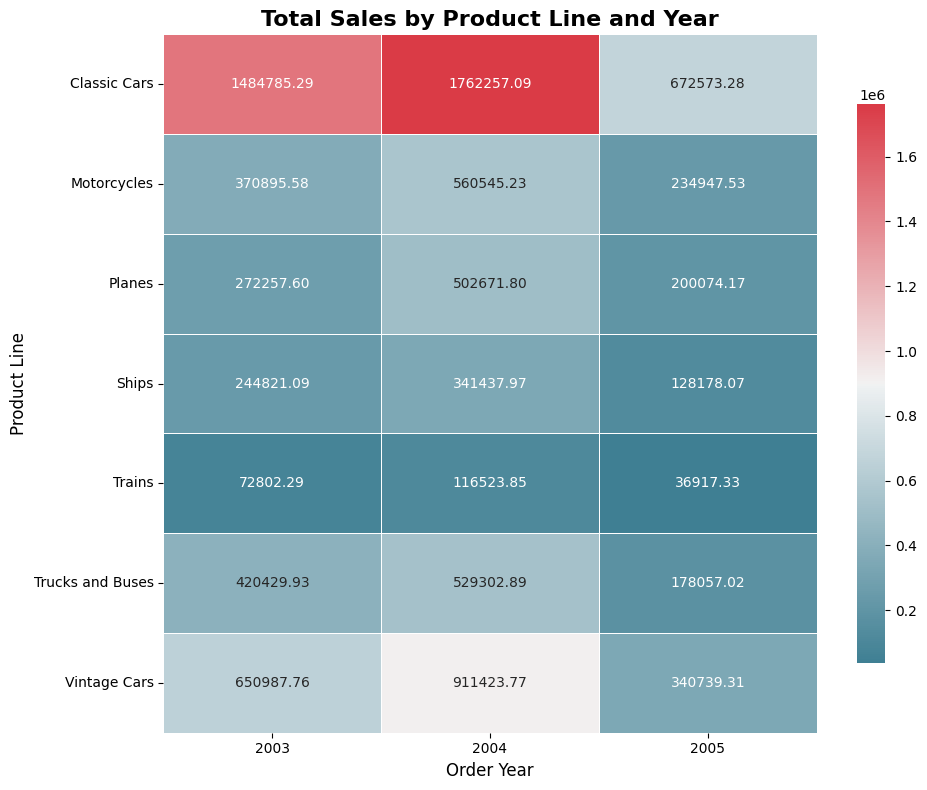

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your Data (Copy and Paste Directly)
data = pd.DataFrame({
    'PRODUCTLINE': ['Classic Cars', 'Classic Cars', 'Classic Cars', 'Motorcycles', 'Motorcycles', 'Motorcycles',
                    'Planes', 'Planes', 'Planes', 'Ships', 'Ships', 'Ships', 'Trains', 'Trains', 'Trains',
                    'Trucks and Buses', 'Trucks and Buses', 'Trucks and Buses', 'Vintage Cars', 'Vintage Cars', 'Vintage Cars'],
    'ORDER_YEAR': [2003, 2004, 2005, 2003, 2004, 2005, 2003, 2004, 2005, 2003, 2004, 2005, 2003, 2004, 2005,
                   2003, 2004, 2005, 2003, 2004, 2005],
    'TOTAL_SALES': [1484785.29, 1762257.09, 672573.28, 370895.58, 560545.23, 234947.53, 272257.60, 502671.80,
                    200074.17, 244821.09, 341437.97, 128178.07, 72802.29, 116523.85, 36917.33, 420429.93,
                    529302.89, 178057.02, 650987.76, 911423.77, 340739.31]
})

# Pivot the data for the heatmap
pivot_table = data.pivot_table(index='PRODUCTLINE', columns='ORDER_YEAR', values='TOTAL_SALES')

# -------------------- Enhanced Heatmap --------------------
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# Custom color map for emphasis (you can experiment with others)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap with customizations
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})

plt.title('Total Sales by Product Line and Year', fontsize=16, fontweight='bold')
plt.xlabel('Order Year', fontsize=12)
plt.ylabel('Product Line', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=0, ha='center')

# Improve layout
plt.tight_layout()

plt.show()

DIAL GAUGES FOR THE YEAR 2004

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Provided Data
data = pd.DataFrame({
    'PRODUCTLINE': ['Classic Cars', 'Classic Cars', 'Classic Cars', 'Motorcycles', 'Motorcycles', 'Motorcycles',
                    'Planes', 'Planes', 'Planes', 'Ships', 'Ships', 'Ships', 'Trains', 'Trains', 'Trains',
                    'Trucks and Buses', 'Trucks and Buses', 'Trucks and Buses', 'Vintage Cars', 'Vintage Cars', 'Vintage Cars'],
    'ORDER_YEAR': [2003, 2004, 2005, 2003, 2004, 2005, 2003, 2004, 2005, 2003, 2004, 2005, 2003, 2004, 2005,
                   2003, 2004, 2005, 2003, 2004, 2005],
    'TOTAL_SALES': [1484785.29, 1762257.09, 672573.28, 370895.58, 560545.23, 234947.53, 272257.60, 502671.80,
                    200074.17, 244821.09, 341437.97, 128178.07, 72802.29, 116523.85, 36917.33, 420429.93,
                    529302.89, 178057.02, 650987.76, 911423.77, 340739.31]
})

# Filter for 2004 data
data_2004 = data[data['ORDER_YEAR'] == 2004].copy() # Use .copy() to avoid SettingWithCopyWarning

# Calculate total sales in 2004
total_sales_2004 = data_2004['TOTAL_SALES'].sum()

# Get unique product lines for 2004
product_lines_2004 = data_2004['PRODUCTLINE'].unique()
num_product_lines = len(product_lines_2004)

# Determine the grid layout (adjust rows and cols as needed)
rows = (num_product_lines + 2) // 3  # Try to fit in 3 columns
cols = min(num_product_lines, 3)

# Create subplots
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type':'indicator'}]*cols]*rows,
                    subplot_titles=[f"{pl} Sales (2004) %" for pl in product_lines_2004])

# Add gauge charts for each product line
for i, product_line in enumerate(product_lines_2004):
    product_line_sales = data_2004[data_2004['PRODUCTLINE'] == product_line]['TOTAL_SALES'].values[0]
    percentage = (product_line_sales / total_sales_2004) * 100
    row = (i // cols) + 1
    col = (i % cols) + 1

    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=percentage,
        domain={'x': [0, 1], 'y': [0, 1]},
        gauge={
            'axis': {'range': [None, 100]},
            'bar': {'color': "royalblue"},
            'steps': [
                {'range': [0, 33], 'color': "red"},
                {'range': [33, 66], 'color': "yellow"},
                {'range': [66, 100], 'color': "green"}],
            'threshold': {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': 80  # Example threshold - adjust as needed
            }
        },
        name=product_line  # For legend/hover information
    ), row=row, col=col)

fig.update_layout(
    title_text="Product Line Sales in 2004 (Percentage of Total)",
    showlegend=False,
    height=250 * rows,  # Adjust height based on the number of rows
    width=300 * cols    # Adjust width based on the number of columns
)

fig.show()

In [ ]:
import plotly.graph_objects as go

# Sample Data 1 (Sales vs Target and Previous Year)
product_lines_fever_1 = ['Trucks and Buses', 'Planes', 'Ships']
current_year_sales_1 = [178057, 200074, 128278]
target_sales_1 = [500000, 350000, 200000]
previous_year_sales_1 = [509110, 502762, 334765]

fig_bullet_1 = go.Figure()

for i in range(len(product_lines_fever_1)):
    fig_bullet_1.add_trace(go.Indicator(
        mode="number+delta+gauge",
        value=current_year_sales_1[i],
        delta={"reference": previous_year_sales_1[i]},
        domain={'x': [0, 1], 'y': [i/len(product_lines_fever_1), (i+1)/len(product_lines_fever_1)]},
        title={'text': product_lines_fever_1[i]},
        gauge={
            'shape': "bullet",
            'axis': {'range': [min(previous_year_sales_1 + target_sales_1) * 0.8, max(previous_year_sales_1 + target_sales_1) * 1.2]},
            'steps': [
                {'range': [min(previous_year_sales_1 + target_sales_1) * 0.8, target_sales_1[i]], 'color': "lightgray"},
                {'range': [target_sales_1[i], max(previous_year_sales_1 + target_sales_1) * 1.2], 'color': "lightgreen"}],
            'threshold': {
                'line': {'color': "black", 'width': 2},
                'thickness': 0.75,
                'value': target_sales_1[i]}
        }
    ))

fig_bullet_1.update_layout(height=100 * len(product_lines_fever_1), title_text="Sales Performance vs. Target and Previous Year")
fig_bullet_1.show()
